# Configuración del notebook

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 22.6MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 194kB 24.8MB/s 
     |████████████████████████████████| 1.1MB 47.0MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *
from IPython.display import display,HTML

In [3]:
import numpy as py
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
%%capture
!pip install wandb
#wandb login
import wandb
from fastai.callback.wandb import *

<img alt="Diagram of the ULMFiT process" width="450" src="https://github.com/fastai/fastbook/blob/master/images/att_00027.png?raw=1">

# Preprocessing

In [29]:
from fastai.text.all import *

In [30]:
path = "/content/amazon_reviews_us_Camera_v1_00.tsv"

In [31]:
%%capture
df = pd.read_csv(path,delimiter='\t',error_bad_lines=False)


In [32]:
%%capture
df = df.head(100000)
df.head()

In [33]:
df.shape

(100000, 15)

In [34]:
df = df[['star_rating','review_body']]
df.head()

,star_rating,review_body
0,5.0,ok
1,5.0,"Perfect, even sturdier than the original!"
2,2.0,"If the words, &#34;Cheap Chinese Junk&#34; come to your mind when you see this, then congratulate yourself. You're pretty close. One of the most important features of a 'security camera&#34; is the ability to detect motion and record, especially when running on battery and limited storage space. I tested the motion detect on this camera in a few different environments so far (i.e. low light, indoors, outdoors, etc..) and all I got was a SD card full of video triggers. All the testing was done with the low motion sensitivity setting. I can't even imagine what the high one would be.<br ..."
3,5.0,"Exactly what I wanted and expected. Perfect for hiking or carrying when you are going someplace you MAY need a quick closeup. I bought it to leave in my glovebox so I always have it with me. I've used it a few times already and couldn't be happier with it. For the price, it's definitely worth picking up if you are looking for a good monocular."
4,5.0,"I will look past the fact that they tricked me into believing this is a Canon product. It's not by Canon. It's some generic brand that i've never heard of. HOWEVER, it works surprisingly well! The sound quality is actually really good. The wire is actually super long and is perfect for indoor shooting."


In [35]:
df = df.dropna()

In [36]:
df['star_rating'] = df['star_rating'].astype(int)

In [37]:
print ((df['star_rating'] == 5).sum())
print ((df['star_rating'] == 4).sum())
print ((df['star_rating'] == 3).sum())
print ((df['star_rating'] == 2).sum())
print ((df['star_rating'] == 1).sum())

62726
15527
7320
4749
9662


In [38]:
df['star_rating']= py.where(df['star_rating']>=4,1,0) ##asi un poco mas balanceado 
df.head()

,star_rating,review_body
0,1,ok
1,1,"Perfect, even sturdier than the original!"
2,0,"If the words, &#34;Cheap Chinese Junk&#34; come to your mind when you see this, then congratulate yourself. You're pretty close. One of the most important features of a 'security camera&#34; is the ability to detect motion and record, especially when running on battery and limited storage space. I tested the motion detect on this camera in a few different environments so far (i.e. low light, indoors, outdoors, etc..) and all I got was a SD card full of video triggers. All the testing was done with the low motion sensitivity setting. I can't even imagine what the high one would be.<br ..."
3,1,"Exactly what I wanted and expected. Perfect for hiking or carrying when you are going someplace you MAY need a quick closeup. I bought it to leave in my glovebox so I always have it with me. I've used it a few times already and couldn't be happier with it. For the price, it's definitely worth picking up if you are looking for a good monocular."
4,1,"I will look past the fact that they tricked me into believing this is a Canon product. It's not by Canon. It's some generic brand that i've never heard of. HOWEVER, it works surprisingly well! The sound quality is actually really good. The wire is actually super long and is perfect for indoor shooting."


In [39]:
print ((df['star_rating'] == 1).sum())
print ((df['star_rating'] == 0).sum())

78253
21731


In [40]:
final_true= df[df['star_rating']==1][:25000]
final_false = df[df['star_rating']==0][:21000]
df = final_true.append(final_false)
df = df.sample(frac = 1, random_state = 1)
df = df.reset_index(drop=True)
len(df)

46000

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


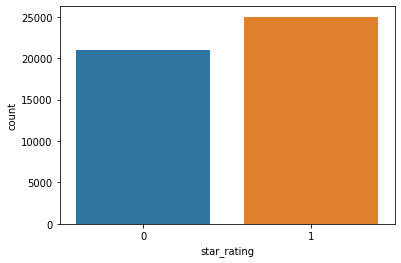

In [41]:
sns.countplot(df['star_rating'])

In [42]:
#df = df[0:200]
df['index'] = df.index
df.head()

,star_rating,review_body,index
0,0,"I'm not sure how everyone else has such good luck with this product. Mine has been absolute garbage. Typically I buy off brand gopro accessories because most of the time they're the exact same quality, this one however is made out of inferior material.<br /><br />I say this because I bought this about a month ago for our trip to disney tomorrow. I took the goose neck off for the first time, which means pressing in the little tabs just like on the camera quick release clasp, and bot tabs broke right off.<br /><br />So now I have a really nice clip and a goose neck that won't attach to anyth...",0
1,1,Have had my strap on my canon for about 6 months now. I adore it!,1
2,0,the glue that holds the cap to the safety cord did not last. good cap,2
3,1,These are awesome and I love that I can just screw them on to my other lenses.,3
4,0,I just got this charger and it won't evon charge the battery. Onle one the the four battery's will charge,4


In [43]:
df['is_valid']= py.where(df['index'] < 30000 ,'False','True') #divido en train valid pero a ojo 
d = {'True': True, 'False': False}
df['is_valid']= df['is_valid'].map(d)
df.dtypes

star_rating     int64
review_body    object
index           int64
is_valid         bool
dtype: object

In [44]:
df.head()

,star_rating,review_body,index,is_valid
0,0,"I'm not sure how everyone else has such good luck with this product. Mine has been absolute garbage. Typically I buy off brand gopro accessories because most of the time they're the exact same quality, this one however is made out of inferior material.<br /><br />I say this because I bought this about a month ago for our trip to disney tomorrow. I took the goose neck off for the first time, which means pressing in the little tabs just like on the camera quick release clasp, and bot tabs broke right off.<br /><br />So now I have a really nice clip and a goose neck that won't attach to anyth...",0,False
1,1,Have had my strap on my canon for about 6 months now. I adore it!,1,False
2,0,the glue that holds the cap to the safety cord did not last. good cap,2,False
3,1,These are awesome and I love that I can just screw them on to my other lenses.,3,False
4,0,I just got this charger and it won't evon charge the battery. Onle one the the four battery's will charge,4,False


# Tokenization and numericalization (solo para ver como funciona) 

WORD TOKENIZATION with fastai

In [ ]:
# Let's take the first review:
txt = df['review_body'].iloc[0]
txt

In [ ]:
spacy = WordTokenizer()
toks = first(spacy([txt]))
print(coll_repr(toks, 30))

In [ ]:
tkn = Tokenizer(spacy)
print(coll_repr(tkn(txt), 31))

In [ ]:
txts = df['review_body'].iloc[0:200]
txts

In [ ]:
toks200 = txts[:200].map(tkn)
toks200.head()

Numericalize le tenemos que pasar nuestro texto tokenizado

In [ ]:
num = Numericalize()
num.setup(toks200)
coll_repr(num.vocab,20)

In [ ]:
nums = num(toks)[:20]; nums

In [ ]:
' '.join(num.vocab[o] for o in nums) ## para reconstruir

In [ ]:
nums200 = toks200.map(num)

In [ ]:
dl = LMDataLoader(nums200)

In [ ]:
x,y = first(dl)
x.shape,y.shape

Dependent variable

In [ ]:
' '.join(num.vocab[o] for o in x[0][:20])

Independent variable ( shifted one word to the right , following word)

In [ ]:
' '.join(num.vocab[o] for o in y[0][:20])

# Train language model of amazon reviews (to put on top of wikipedia lenguage model)

Fastai handles tokenization and numericalization cuando pasamos TextBlock to DataBlock 

In [46]:
#DATA BLOCKS

amazon = DataBlock(blocks=TextBlock.from_df('review_body', is_lm=True),
                    get_x=ColReader('text'),
                    splitter=ColSplitter())

dls_lm = amazon.dataloaders(df, bs=128, seq_len=80)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [47]:
dls_lm.show_batch(max_n=6)

,text,text_
0,"xxbos xxmaj just used it on our river trip in xxmaj europe and found the settings to be spot on . xxmaj threads easily and adjusts smoothly . a good universal fader . xxbos xxmaj great product . xxmaj fits just right , protects the screen and you do n't even know it 's there . xxbos xxmaj great quality , mounts on tripod with tripod adaptor for ease of viewing distant objects or the stars and planets . xxbos","xxmaj just used it on our river trip in xxmaj europe and found the settings to be spot on . xxmaj threads easily and adjusts smoothly . a good universal fader . xxbos xxmaj great product . xxmaj fits just right , protects the screen and you do n't even know it 's there . xxbos xxmaj great quality , mounts on tripod with tripod adaptor for ease of viewing distant objects or the stars and planets . xxbos xxmaj"
1,"inside the umbrella . xxmaj the item was also not new or a returned item . xxbos xxmaj manual focus , manual aperture , and no image stabilization . xxmaj i 'm using it on a xxup aps - c xxup slr in xxup ae mode . xxmaj creamy texture for landscapes and a wonderful lens for group pictures . i will be using this on my ( all manual ) film camera also - the advantage of older lenses","the umbrella . xxmaj the item was also not new or a returned item . xxbos xxmaj manual focus , manual aperture , and no image stabilization . xxmaj i 'm using it on a xxup aps - c xxup slr in xxup ae mode . xxmaj creamy texture for landscapes and a wonderful lens for group pictures . i will be using this on my ( all manual ) film camera also - the advantage of older lenses being"
2,as a lesson learned on how to waste your money . \n\n i recently brought it out of storage thinking i had a better frame of mind and things would go smoother . i was living in a fools xxunk . \n\n i will begin this by saying i am still not pleased by the product and ease of use . \n\n xxmaj what impressed me me enough that i gave it an extra 2 stars was the great customer,a lesson learned on how to waste your money . \n\n i recently brought it out of storage thinking i had a better frame of mind and things would go smoother . i was living in a fools xxunk . \n\n i will begin this by saying i am still not pleased by the product and ease of use . \n\n xxmaj what impressed me me enough that i gave it an extra 2 stars was the great customer service
3,"days after the window for return closed this battery does not hold a full charge and gets triggers the alarm ( all lights blinking ) of the charger . xxmaj the instructions say to "" remove battery and unplug the charger immediately , then contact a xxmaj nikon service … "" . i tried the charger with an old battery and it is working ok . xxmaj therefore , the conclusion is that the battery is faulty after a few","after the window for return closed this battery does not hold a full charge and gets triggers the alarm ( all lights blinking ) of the charger . xxmaj the instructions say to "" remove battery and unplug the charger immediately , then contact a xxmaj nikon service … "" . i tried the charger with an old battery and it is working ok . xxmaj therefore , the conclusion is that the battery is faulty after a few weeks"
4,"does little to nothing to black extreme sunlight - xxmaj xxunk still looking at my reflection when xxmaj i 'm trying to get my focus . xxmaj point being , you get what you pay for , and this does n't cost very much . xxbos xxmaj it works good , but you have to charge all 4 batteries at one time . i really wish it could charge 2 at a time , so that you could always have","little to nothing to black extreme sunlight - xxmaj xxunk still looking at my reflection when xxmaj i 'm trying to get my focus . xxmaj point being , you get what you pay for , and this does n't cost very much . xxbos xxmaj it works good , but you have to charge all 4 batteries at one time . i really wish it could charge 2 at a time , so that you could always have a"
5,"into the hole at the top of the device beca

In [48]:
learn = language_model_learner(
    dls_lm, AWD_LSTM, drop_mult=0.3,           ### awd_lstm rnn que ya introduce dropout y mas (regularizacion)
    metrics=[accuracy, Perplexity()]).to_fp16()

In [49]:
learn.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.091496,3.834526,0.281140,46.271481,01:29


In [50]:
learn.save('1epoch')

Path('models/1epoch.pth')

In [51]:
learn = learn.load('1epoch')

In [52]:
learn.unfreeze()
learn.fit_one_cycle(10, 2e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.816543,3.730186,0.293423,41.686871,01:35
1,3.720192,3.673931,0.298598,39.406525,01:35
2,3.581001,3.612213,0.307145,37.047955,01:34
3,3.441227,3.574243,0.312560,35.667614,01:34
4,3.294025,3.571718,0.314695,35.577671,01:35
5,3.136648,3.592673,0.314130,36.331070,01:34
6,3.012227,3.622877,0.311989,37.445137,01:34
7,2.895114,3.652350,0.311271,38.565205,01:34
8,2.804257,3.677830,0.310308,39.560455,01:34
9,2.778485,3.687329,0.309786,39.938034,01:33


In [53]:
learn.save_encoder('finetuned')

In [ ]:
wandb.finish()

# Creating classifier DataLoaders, training complete classifier

In [76]:
wandb.init(project='finalamazon1');

epoch,5
train_loss,0.1702
raw_loss,0.14156
wd_0,0.01
sqr_mom_0,0.99
lr_0,0.0
mom_0,0.8
eps_0,1e-05
wd_1,0.01
sqr_mom_1,0.99
lr_1,0.0


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_loss,█▇▆▆▆▆▆▆▆▅▅▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▁▂▂▂▂▁▁▁▁▁▁▁▁
raw_loss,▇█▆▅▇▅█▇█▇▅▆▄▆▄▄▃▆▅▃▃▃▄▂▃▂▂▂▂▂▅▃▃▂▂▂▃▂▁▁
wd_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sqr_mom_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr_0,▂▅█▇▆▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mom_0,▇▄▁▂▃▅▇██▃▁▂▄▆▇█▇▂▁▂▃▅▇██▅▃▁▁▁▂▃▃▄▅▆▇▇██
eps_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wd_1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sqr_mom_1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr_1,▂▅█▇▆▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


In [77]:
dls_clas = DataBlock(blocks=(TextBlock.from_df('review_body', seq_len=72, vocab=dls_lm.vocab), CategoryBlock),
                      get_x=ColReader('text'),
                      get_y=ColReader('star_rating'),
                      splitter=ColSplitter()).dataloaders(df, bs=128, seq_len=72)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [78]:
dls_clas.show_batch(max_n=5)

,text,category
0,"xxbos xxmaj hi , \n\n xxmaj this is my review of the product listed on xxmaj amazon as : \n\n easyacc xxmaj selfie xxmaj stick xxunk xxmaj pro xxunk xxmaj self - portrait xxmaj monopod xxmaj extendable xxmaj wireless xxmaj bluetooth xxmaj selfie xxmaj stick with built - in xxmaj bluetooth xxmaj remote xxmaj shutter xxmaj with xxmaj adjustable xxmaj phone xxmaj holder for iphone 6 , iphone 6 xxmaj plus , iphone 5 5s 5c , xxmaj android \n\n i received this product today and have evaluated it for an hour to give a detailed review . xxmaj included are a set of photos that i captured showing the product up close in case anyone is interested . \n\n xxup unboxing xxup and xxup observation : \n\n xxmaj when i first received this sample , i found the box had taken a beating during shipment from xxmaj amazon .",1
1,"xxbos i brought 3 of these cameras from xxmaj xxunk , and they were , indeed , the chinese version . xxmaj however , they came default with english firmware , which was the main reason why i purchased two more from the same seller after buying my first one . xxmaj this is not a plug - and - play security camera , and you will need some network knowledge to configure the camera correctly . i hope to help as many buyers as possible , helping figure out whether or not if this camera is right for them . xxmaj before moving forward , let me just point out some obvious facts : this is a fixed lens camera with a wide angle 2.8 mm glass lens , if you are looking for a camera with tilt / pan feature , please look else where . xxmaj you",1
2,"xxbos xxmaj my original review was written in xxmaj august 2015 based on owning two xxup fi9821p xxup v2 cameras and was a generally favorable review . i have updated this review as of xxmaj april 2017 and xxmaj sep 2017 to a generally unfavorable review . \n\n xxmaj when i tried this camera for the first time , i got disappointed and frustrated rather quickly and thought about sending it back . xxmaj the frustration came mostly from the software and the biggest part of that is xxmaj foscam not adequately documenting what the settings do and what the various choices really means . xxmaj let me explain what i mean by that . xxmaj when a software manual tells you for a particular setting to select either a or b or c and on the actual camera setup page you see exactly that in the pull down menu",0
3,"xxbos 3 xxmaj updates xxmaj below for xxmaj review \n\n xxmaj this bag is near perfect . xxmaj it is sturdy , feels very durable and high quality , has plenty of space and options for carry , good design , and nice style . \n\n i needed more room for my xxup nex-5 t and bigger lenses as well as space for other items compared to my other sling camera bag . xxmaj this comfortably holds a large xxup dslr as well as many lenses and accessories so this effortlessly carries my xxup nex-5 t and xxmaj sony xxunk lens on the side . xxmaj it is a bit of overkill for my setup but i wanted options and extra room my previous bag could n't accommodate . \n\n i really like the amount of space this bag offers . xxmaj by allowing for so much room , this",1
4,"xxbos [ [ xxunk : xxmaj xxunk 15 , 2017 - i still fly my xxup xiro xxmaj xplorer but overall i am disappointed with the xxmaj xplorer xxup v. i have had xxunk erratic movement during flights that xxup xiro support was unable to explain . i have had a devastating experience where the battery fell off the xxmaj xplorer mid - flight causing a crash that destroyed the gimbal . xxup xiro actually replaced the gimbal but the fact that the design even allowed such a failure to occur is xxunk and precisely why you should not fly a drone above people or vehicles . xxmaj the price has dropped considerably since my purchase of this 2 years ago ( july 2015 ) and i do think it flies well and has good qualtiy video capture . xxmaj but the poor design of how the battery attaches is",0


In [79]:
learn = text_classifier_learner(dls_clas, AWD_LSTM, drop_mult=0.7, metrics = accuracy, cbs=[WandbCallback(log_dataset=True, log_model=True), SaveModelCallback()])

In [80]:
learn = learn.load_encoder('finetuned') 

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.007585775572806597)

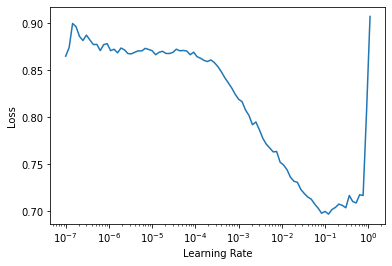

In [81]:
learn.lr_find()

In [82]:
learn.fit_one_cycle(1, 2e-2)  ## start training at a low learning rate, gradually increase it for the first section of training, and then grad‐ ually decrease it again for the last section of training:

WandbCallback could not retrieve the dataset path, please provide it explicitly to "log_dataset"


epoch,train_loss,valid_loss,accuracy,time
0,0.544959,0.287803,0.882250,01:15


Better model found at epoch 0 with valid_loss value: 0.28780341148376465.


wandb: Adding directory to artifact (/tmp/tmpt6ru6c7e)... Done. 0.2s


In [83]:
learn.freeze_to(-2)

In [84]:
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.374350,0.288963,0.877375,01:20


Better model found at epoch 0 with valid_loss value: 0.2889629900455475.


wandb: Adding directory to artifact (/tmp/tmp_23i9rzq)... Done. 0.2s


In [85]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.316656,0.268584,0.897750,01:42


Better model found at epoch 0 with valid_loss value: 0.26858365535736084.


wandb: Adding directory to artifact (/tmp/tmpfp7edggm)... Done. 0.2s


In [86]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3)) 

epoch,train_loss,valid_loss,accuracy,time
0,0.289335,0.263246,0.897937,02:04
1,0.271870,0.257693,0.900250,01:59


Exception ignored in: <finalize object at 0x7f375c042160; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.6/weakref.py", line 548, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.6/tempfile.py", line 938, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.6/shutil.py", line 477, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.6/shutil.py", line 475, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tmp_23i9rzq'
Exception ignored in: <finalize object at 0x7f375c042420; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.6/weakref.py", line 548, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.6/tempfile.py", line 938, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.6/shutil.py", line 477, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.6/shutil.p

Better model found at epoch 0 with valid_loss value: 0.26324591040611267.
Better model found at epoch 1 with valid_loss value: 0.2576928734779358.


wandb: Adding directory to artifact (/tmp/tmp4onnt_0i)... Done. 0.2s


Conseguimos casi un 92% de accuracy

In [86]:
wandb.finish()